<a href="https://colab.research.google.com/github/PiyushSharma1999/tensorflow_course/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can also discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we'er working with are from the Foof101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we'ev modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start witha smaller dataset so we can experiment quickly and figure what works (or better yet what dosen't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-12-26 12:40:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   293MB/s    in 0.4s    

2022-12-26 12:40:34 (293 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial stepa at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project.. this usually means visualizing many sample of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_stak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec 21 08:29 .
drwxr-xr-x 1 root root 4096 Dec 21 08:29 ..
drwxr-xr-x 4 root root 4096 Dec 21 08:29 test
drwxr-xr-x 4 root root 4096 Dec 21 08:29 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

 To visualize our images, first let's get the class names programmatically.
 

In [ ]:
# get the classnames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [13]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using maplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image sahpe: {img.shape}") # show the shape of the image

  return img

['2428085.jpg']
Image sahpe: (384, 512, 3)


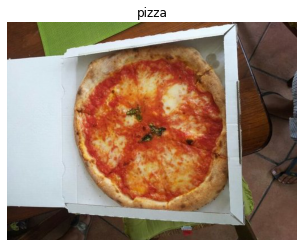

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

NameError: ignored

In [ ]:
# View the image shape
img.shape # return width, height, colour channels

(384, 512, 3)

🔑**Note:** As we'ev discussed brfore, many machine learning models, inclding neural network prefer the values they work with to be between 0 and 1. Knowing this, one of the most commo preprocessing steps for working with images is to **scale**(also referred to as **normalizw**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value.)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.31372549, 0.17647059, 0.09019608],
        [0.30196078, 0.16470588, 0.07843137],
        [0.29803922, 0.16078431, 0.0745098 ],
        ...,
        [0.24705882, 0.17647059, 0.09803922],
        [0.27058824, 0.18823529, 0.12156863],
        [0.24313725, 0.16078431, 0.09411765]],

       [[0.30196078, 0.16470588, 0.07843137],
        [0.29411765, 0.15686275, 0.07058824],
        [0.29019608, 0.15294118, 0.06666667],
        ...,
        [0.22745098, 0.15686275, 0.07843137],
        [0.25098039, 0.17647059, 0.10980392],
        [0.24705882, 0.16470588, 0.09803922]],

       [[0.29019608, 0.15294118, 0.06666667],
        [0.28627451, 0.14901961, 0.0627451 ],
        [0.29019608, 0.15294118, 0.06666667],
        ...,
        [0.19215686, 0.12156863, 0.04313725],
        [0.22352941, 0.15294118, 0.0745098 ],
        [0.22745098, 0.15294118, 0.08627451]],

       ...,

       [[0.05882353, 0.04313725, 0.03921569],
        [0.05490196, 0.03921569, 0.03529412],
        [0.05490196, 0

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess out images
* Build a CNN to find patterns in our images
* Compiler out CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called as scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10,
                                                            kernel_size=3,
                                                            activation="relu",
                                                            input_shape=(224, 224, 3)),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2,
                                                               padding="valid"),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 216ms/step - loss: 0.5614 - accuracy: 0.7247 - val_loss: 0.5030 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4228 - accuracy: 0.7987 - val_loss: 0.3388 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4128 - accuracy: 0.8100 - val_loss: 0.3443 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3769 - accuracy: 0.8487 - val_loss: 0.3366 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3579 - accuracy: 0.8487 - val_loss: 0.3176 - val_accuracy: 0.8760


> 🔑**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going Runtime-> Change Runtime Type-> Hardware Accelarator-> GPU (you may have to rerun some cells above).

In [ ]:
# Compiling CNN without GPU

#Epoch 1/5
#47/47 [==============================] - 116s 2s/step - loss: 0.6006 - accuracy: 0.6593 - val_loss: 0.4291 - val_accuracy: 0.8280

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

🛠**Practice/Exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we'ev built in a previous section to see if it works image data. The model we'er building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,2&seed=0.09653&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create  a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 0.7017 - accuracy: 0.4867 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despit having 20x more parameters than our CNN(model_1), model_2 performs terribly... let's try

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 192ms/step - loss: 2.7593 - accuracy: 0.6127 - val_loss: 1.8745 - val_accuracy: 0.5680
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 1.2623 - accuracy: 0.6627 - val_loss: 0.5217 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.5544 - accuracy: 0.7547 - val_loss: 0.5622 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4790 - accuracy: 0.7713 - val_loss: 0.4898 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4923 - accuracy: 0.7860 - val_loss: 0.4431 - val_accuracy: 0.7620


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


🔑**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lot's of cases, it is. But in this case, the difference here is the two different styles of model we'er using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though thse are less learnable parameters in our convolutional parameters in our convolutional neural network, these are often more helpful in deciohering between different **features** in an image.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (Start with the baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)


### 1. Become one with the data

['1346387.jpg']
Image sahpe: (512, 512, 3)
['3478964.jpg']
Image sahpe: (512, 512, 3)


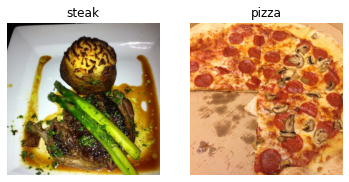

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn out data into **batches**.

A batch is a small subset of data. Rather than look at all-10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to lean very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to ldoa data into

test_data  = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and thn as you keep experimenting, you try to beat the baseline.

> 🔑**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as requierd (e.g. look at which current model is performing best in the field for your problem).

In [ ]:
# Make te creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will  be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,                 # filter is the number of sliding windows going across an input (higher = more complex model)        
           kernel_size=3,              # the size of the sliding window going across an input
           strides=1,                  # the size of the step the sliding window takes across an input
           padding='valid',            # if "same", output shape is same as input shape, if "valid", output shape gets compressed 
           activation='relu',
           input_shape=(224, 224, 3)), # input layer (sepcify input shape)
    Conv2D(10, 3, activation='relu'),  
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')     # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 0.9975 - accuracy: 0.6613 - val_loss: 0.4501 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4036 - accuracy: 0.8280 - val_loss: 0.3603 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.2998 - accuracy: 0.8907 - val_loss: 0.3776 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.1581 - accuracy: 0.9487 - val_loss: 0.4682 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.0605 - accuracy: 0.9833 - val_loss: 0.6224 - val_accuracy: 0.8100


### 5. Evaluating out model

It looks like our model is learning something, let's evaluate it.

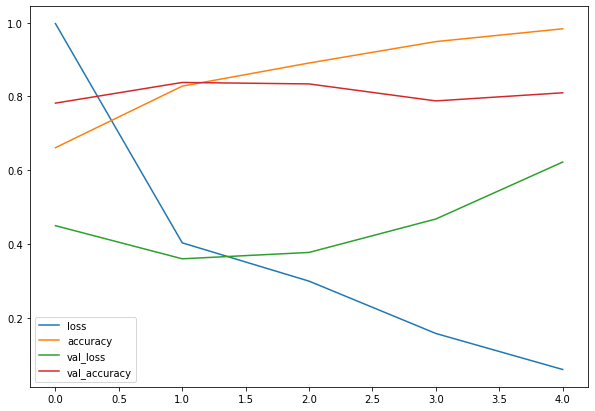

In [ ]:
# Let's plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot the valdation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend(); 

🔑**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus model's ability to generalize to unseen data will be diminished.

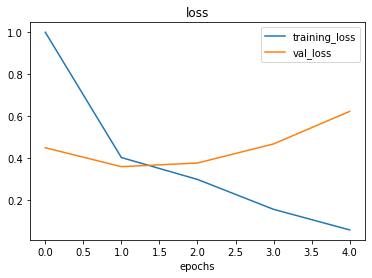

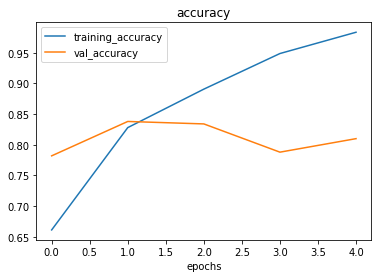

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

🔑**Note:** Ideally the tow loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting.**

### 6. Adjust hte model parameters

Fitting a machine leaning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by ovefitting a larger a model
2. Redice overfitting

Ways to induce overfitting:

* Increase the number of Conv layres
* Increase the number of Conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add Regularization layres (such as MaxPool2D)
* Add more data...

> 🔑**Note:** Reducing overfitting is also known as **regularization.**

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3 ,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model 
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 0.6156 - accuracy: 0.6480 - val_loss: 0.4602 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4767 - accuracy: 0.7780 - val_loss: 0.4630 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.4561 - accuracy: 0.8000 - val_loss: 0.3762 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4179 - accuracy: 0.8220 - val_loss: 0.3498 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3974 - accuracy: 0.8373 - val_loss: 0.3660 - val_accuracy: 0.8520


In [ ]:
# Get a summary of our model tith max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


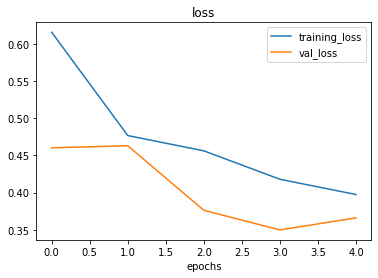

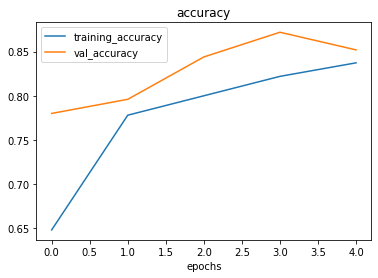

In [ ]:
# PLot loss curver
plot_loss_curves(history_5)

### Opening our bags of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance witha data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2,   # shear the image
                                             zoom_range=0.2,    # zoom into the image
                                             width_shift_range=0.2,   # shift the image width ways
                                             height_shift_range=0.2,  # shift the image heigt ways
                                             horizontal_flip=True)  # flip the image on the horizonatal axis

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenrator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar. 

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented  = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=False)   # for demonstration purpose only

# Create a non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Nn-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")



Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Nn-augmented test data:
Found 500 images belonging to 2 classes.


🔑**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)


showing image number: 3


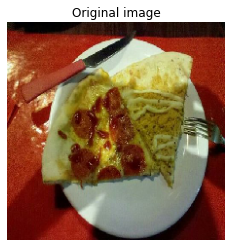

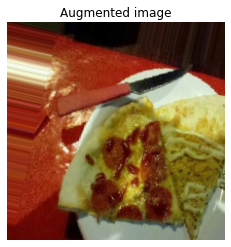

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # out batch sizes are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we'ev seen what augmented training data looks like, let's build a model and see how it learns

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 476ms/step - loss: 0.7029 - accuracy: 0.4640 - val_loss: 0.6875 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6983 - accuracy: 0.5280 - val_loss: 0.6822 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6868 - accuracy: 0.5607 - val_loss: 0.6615 - val_accuracy: 0.6760
Epoch 4/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6483 - accuracy: 0.6367 - val_loss: 0.5799 - val_accuracy: 0.6880
Epoch 5/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6898 - accuracy: 0.5960 - val_loss: 0.6202 - val_accuracy: 0.6380


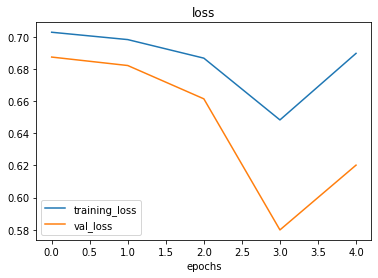

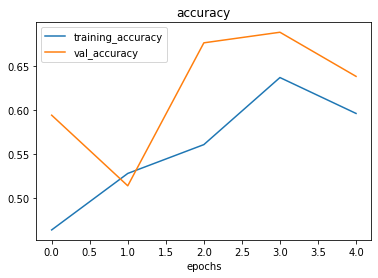

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224, 224),
                                                                           class_mode="binary",
                                                                           batch_size=32,
                                                                           shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model 5 and model 6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffle, # we'er fitting on augmented and shuffled data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 478ms/step - loss: 0.6232 - accuracy: 0.6527 - val_loss: 0.4496 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 22s 470ms/step - loss: 0.5080 - accuracy: 0.7620 - val_loss: 0.3627 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 22s 473ms/step - loss: 0.4832 - accuracy: 0.7647 - val_loss: 0.3737 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 22s 474ms/step - loss: 0.4733 - accuracy: 0.7727 - val_loss: 0.3819 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 23s 490ms/step - loss: 0.4562 - accuracy: 0.7887 - val_loss: 0.3400 - val_accuracy: 0.8580


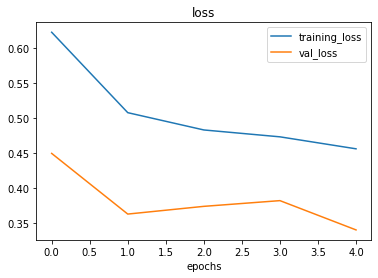

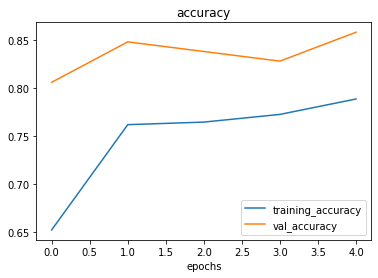

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

🔑**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we'ev already beaten our baseline, there are a few things we could try to continue to improve our model

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model opprotunities to learn)
* Use **tranfer learning** to leverage what another image model has learn and adjust it for our own use case

🛠**Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

In [ ]:
# Create a model (same as model_1)
model_8 = Sequential([
    Conv2D(32, 3, activation="relu"),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_6.fit(train_data_augmented_shuffle,
                        epochs=6,
                        steps_per_epoch = len(train_data_augmented_shuffle),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/6
47/47 [==============================] - 23s 495ms/step - loss: 0.4329 - accuracy: 0.8080 - val_loss: 0.2912 - val_accuracy: 0.8840
Epoch 2/6
47/47 [==============================] - 22s 470ms/step - loss: 0.4115 - accuracy: 0.8193 - val_loss: 0.3338 - val_accuracy: 0.8560
Epoch 3/6
47/47 [==============================] - 22s 474ms/step - loss: 0.4000 - accuracy: 0.8200 - val_loss: 0.4354 - val_accuracy: 0.8320
Epoch 4/6
47/47 [==============================] - 22s 476ms/step - loss: 0.4133 - accuracy: 0.8167 - val_loss: 0.5378 - val_accuracy: 0.7700
Epoch 5/6
47/47 [==============================] - 22s 470ms/step - loss: 0.4214 - accuracy: 0.8087 - val_loss: 0.2885 - val_accuracy: 0.8840
Epoch 6/6
47/47 [==============================] - 22s 473ms/step - loss: 0.4091 - accuracy: 0.8200 - val_loss: 0.2810 - val_accuracy: 0.8900


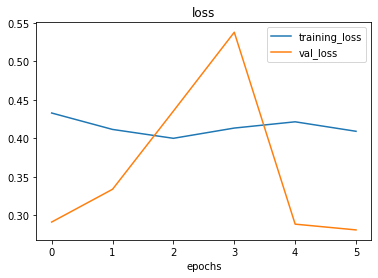

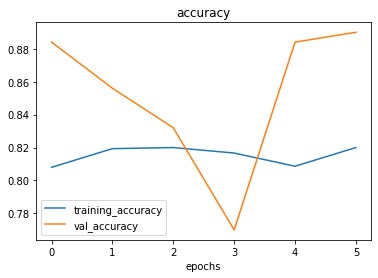

In [ ]:
# Plot loss curves
plot_loss_curves(history_8)

### 8. Making a prediction with our trained model on our own model custom data

In [ ]:
# Classes we'er working with
print(class_names)

['pizza' 'steak']


--2022-12-26 13:28:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.5’

03-steak.jpeg.5     100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2022-12-26 13:28:44 (38.5 MB/s) - ‘03-steak.jpeg.5’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

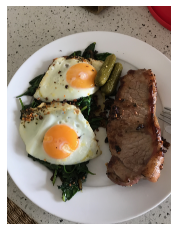

In [ ]:
# View our example images
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

🔑**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
    Reads an image from filename, turns it into a tensor and reshapes it 
    to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 16ms/step


Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we cold visualize the image as well as the model's predictions?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image located at filename, makes a prediction with model 
  and plots the image with predicted class as the title. 
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 17ms/step


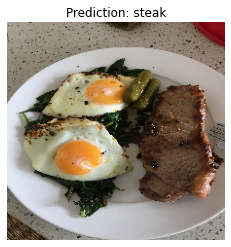

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza 🍕

--2022-12-26 13:57:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2022-12-26 13:57:39 (50.3 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 [==============================] - 0s 20ms/step


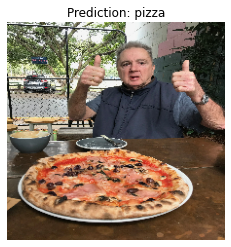

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image classification

We'ev just been througha bunch of the following steps witha binary classification problem (pizza vs. steak), now we'er going to step things up a notch with 10 classes of food (muti-class classification). 

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a basline)
4. Fit the model (overfit it to make sure it works)
5. Evaludate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [2]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-03-20 10:45:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  24.2MB/s    in 22s     

2023-03-20 10:45:43 (22.3 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [6]:
import os 

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {(len(filenames))} images in '{dirpath}'.")

there are 2 directories and 0 images in '10_food_classes_all_data'.
there are 10 directories and 0 images in '10_food_classes_all_data/train'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [8]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Mar 20 10:45 .
drwxr-xr-x  1 root root 4096 Mar 20 10:45 ..
drwxr-xr-x 12 root root 4096 Mar 20 10:45 test
drwxr-xr-x 12 root root 4096 Mar 20 10:45 train


In [9]:
# Setup the train and test directories 
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [11]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3482107.jpg']
Image sahpe: (512, 384, 3)


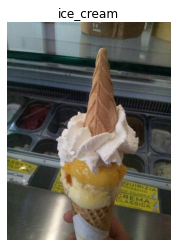

In [29]:
# Visualize, Visualize, Visualize
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


ModuleNotFoundError: ignored